# Project: Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset Description : 
This is a movies dataset consisting of budget, revenue, cast, genres, directors etc., details of movies from around the world. Having more than 10000 movies to analyse, it would be interesting to understand what exactly are the attributes that make a movie popular, and who are the directors making such movies. Another meaty point to analyse would be the year by year popularity of genres.

>Dependent Variables : 
1. Popularity

>Independent Variables : 
1. budget_adj
2. release_year
3. director
4. genres
5. vote_count
6. vote_average
7. production_companies
8. cast (only considering main actor)
9. runtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Load in the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv('./tmdb-movies.csv')
# Check the data
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# Columns in the dataset
df.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

In [4]:
# Columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Columns' statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Try a unique() on each string column and if the values are too many, drop them in favor of a more crisp, uncomplicated analysis. 
print(df.homepage.unique())
print(len(df.homepage.unique()))

# drop this column, values are unusable for analyses
df_clean = df.drop(columns='homepage')
del df

['http://www.jurassicworld.com/' 'http://www.madmaxmovie.com/'
 'http://www.thedivergentseries.movie/#insurgent' ...
 'http://www.animalhouse.com/'
 'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/'
 'http://en.wikipedia.org/wiki/Hooper_(film)']
2897


In [7]:
# Cast contains many values and so is as unique as the rows in the dataset
print(df_clean.cast.unique())
print(len(df_clean.cast.unique()))

["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"
 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman'
 'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller' ...
 'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya'
 'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru'
 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson']
10720


In [8]:
# So, extract only main_actor from cast
df_clean['main_actor'] = df_clean['cast'].apply(lambda x:x.split('|')[0] if not pd.isnull(x) else None)

In [9]:
# drop cast, keep main_actor
df_clean.drop(columns = 'cast', inplace=True)

In [10]:
# Find correaltion between popularity and other numeric columns
numeric_columns = ['budget', 'revenue','runtime','vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
for column in numeric_columns:
    print(column)
    if column!='popularity':
        print(df_clean[['popularity',column]].corr())
    print()

budget
            popularity    budget
popularity    1.000000  0.545472
budget        0.545472  1.000000

revenue
            popularity   revenue
popularity    1.000000  0.663358
revenue       0.663358  1.000000

runtime
            popularity   runtime
popularity    1.000000  0.139033
runtime       0.139033  1.000000

vote_count
            popularity  vote_count
popularity    1.000000    0.800828
vote_count    0.800828    1.000000

vote_average
              popularity  vote_average
popularity      1.000000      0.209511
vote_average    0.209511      1.000000

budget_adj
            popularity  budget_adj
popularity     1.00000     0.51355
budget_adj     0.51355     1.00000

revenue_adj
             popularity  revenue_adj
popularity     1.000000     0.609083
revenue_adj    0.609083     1.000000



In [11]:
# Revenue and votes exert more influence on the popularity of the movie
print(df_clean[['popularity','revenue_adj','vote_count']].corr())

             popularity  revenue_adj  vote_count
popularity     1.000000     0.609083    0.800828
revenue_adj    0.609083     1.000000    0.707942
vote_count     0.800828     0.707942    1.000000


In [12]:
# Find unique genres
diff_genres = set()
for genre in df_clean.genres.unique():
    if not pd.isnull(genre):
        diff_genre = str(genre).split("|")
        for diff in diff_genre:
            diff_genres.add(diff)
print(diff_genres)

# Create separate genres columns to multiple columns, one for each genre
df_clean['genres_list'] = df_clean['genres'].apply(lambda x:x.split('|') if not pd.isnull(x) else '')
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df_clean['genres_list']),
                   columns=mlb.classes_,
                   index=df_clean.index)
df_clean = pd.concat(objs = [df_clean, res], axis=1)
df_clean.head()

{'War', 'Western', 'Action', 'Animation', 'Science Fiction', 'Horror', 'Thriller', 'Mystery', 'Family', 'Crime', 'History', 'Fantasy', 'TV Movie', 'Documentary', 'Comedy', 'Romance', 'Adventure', 'Drama', 'Foreign', 'Music'}


,id,imdb_id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,0,0,0,0,0,0,0,1,0,0


In [13]:
print(df_clean.keywords.unique())

# drop keywords
df_clean.drop(columns='keywords',inplace=True)

['monster|dna|tyrannosaurus rex|velociraptor|island'
 'future|chase|post-apocalyptic|dystopia|australia'
 'based on novel|revolution|dystopia|sequel|dystopic future' ...
 'car race|racing|formula 1' 'car|trolley|stealing car'
 'fire|gun|drive|sacrifice|flashlight']


### Data Cleaning 

In [14]:
# Print info about the dataset
print(df_clean.info())

#Drop columns like id, imdb_id, budget, revenue (use _adj variant), tagline, overview, cast, release_date and producion_companies 
# which is not needed for further analysis
df_clean.drop(columns = ['tagline','production_companies','id','imdb_id','budget','revenue','overview','release_date'],inplace=True)

# Drop null rows now
df_clean.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 40 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
tagline                 8042 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
main_actor              10790 non-null object
genres_list          

In [15]:
# Check for null
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 32 columns):
popularity         10732 non-null float64
original_title     10732 non-null object
director           10732 non-null object
runtime            10732 non-null int64
genres             10732 non-null object
vote_count         10732 non-null int64
vote_average       10732 non-null float64
release_year       10732 non-null int64
budget_adj         10732 non-null float64
revenue_adj        10732 non-null float64
main_actor         10732 non-null object
genres_list        10732 non-null object
Action             10732 non-null int32
Adventure          10732 non-null int32
Animation          10732 non-null int32
Comedy             10732 non-null int32
Crime              10732 non-null int32
Documentary        10732 non-null int32
Drama              10732 non-null int32
Family             10732 non-null int32
Fantasy            10732 non-null int32
Foreign            10732 non-null int3

In [16]:
# Sort values in genres column and assign it back to the same column to be able to group by
df_clean['genres']=df_clean['genres'].apply(lambda x:'|'.join(sorted(x.split('|'))) if not pd.isnull(x) else '')

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What is the trend of budget, popularity,vote_count and runtime's variance since the 1960s to the present?
#### Plot for these trends over all rows and then over only the top 10% popular movies of the respective times

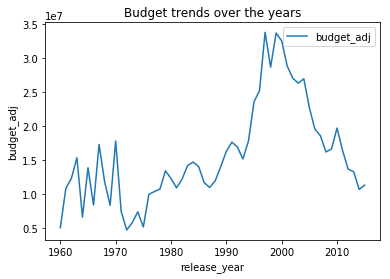

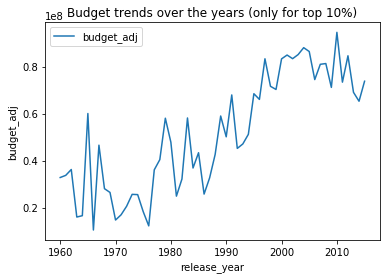

In [17]:
# Overall budget variance over the years
df_clean.groupby(by=['release_year'])['budget_adj'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='budget_adj',title='Budget trends over the years').set(ylabel='budget_adj');

# Popular budget variance over the years
year_popularity = df_clean.groupby('release_year')['popularity'].quantile(q=0.9)

df_popularity = df_clean.apply(lambda row:row if row['popularity']>=year_popularity[row['release_year']] else None, axis=1)

df_popularity.groupby(by=['release_year'])['budget_adj'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='budget_adj',title='Budget trends over the years (only for top 10%)').set(ylabel='budget_adj');

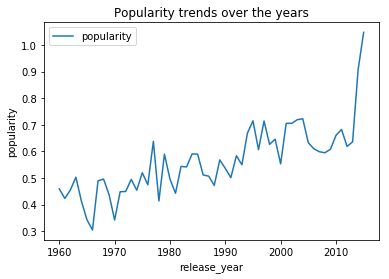

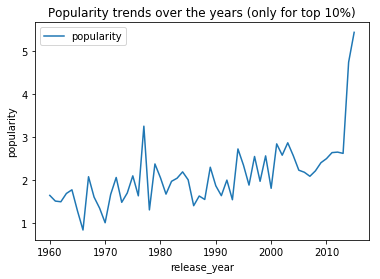

In [18]:
# Overall popularity variance over the years
df_clean.groupby(by=['release_year'])['popularity'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='popularity',title='Popularity trends over the years').set(ylabel='popularity');

# Popular Popularity variance over the years
df_popularity.groupby(by=['release_year'])['popularity'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='popularity',title='Popularity trends over the years (only for top 10%)').set(ylabel='popularity');

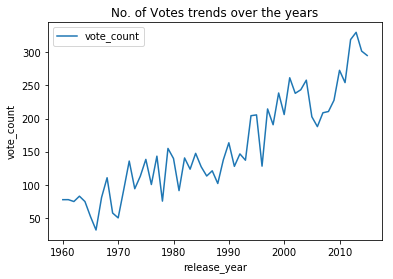

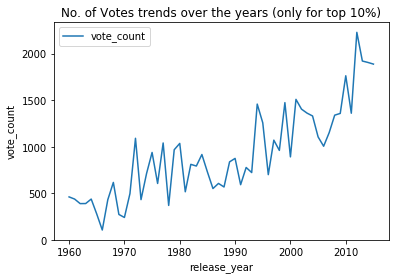

In [19]:
# Overall runtime variance over the years
df_clean.groupby(by=['release_year'])['vote_count'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='vote_count',title='No. of Votes trends over the years').set(ylabel='vote_count');

# Popular runtime variance over the years
df_popularity.groupby(by=['release_year'])['vote_count'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='vote_count',title='No. of Votes trends over the years (only for top 10%)').set(ylabel='vote_count');

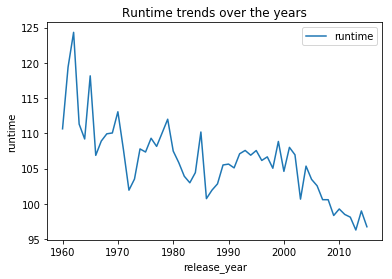

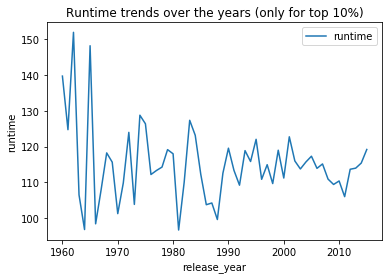

In [20]:
# Overall runtime variance over the years
df_clean.groupby(by=['release_year'])['runtime'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='runtime',title='Runtime trends over the years').set(ylabel='runtime');

# Popular runtime variance over the years
df_popularity.groupby(by=['release_year'])['runtime'].mean().reset_index().sort_values(by=['release_year']).plot(
    x='release_year',y='runtime',title='Runtime trends over the years (only for top 10%)').set(ylabel='runtime');

### 2. Which are the genres that have been popular over the years?

#### Plot this trend for all movies and then over only top 10% every year

c:\users\jraghupa\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


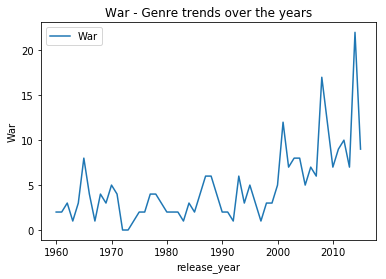

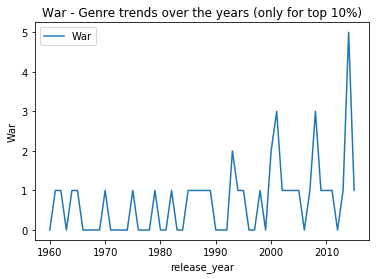

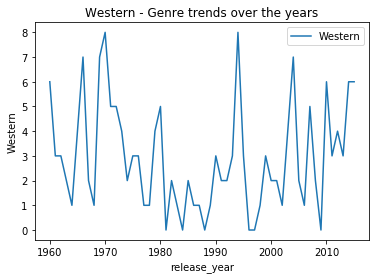

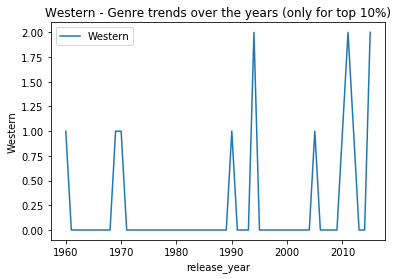

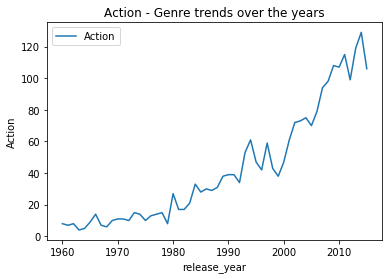

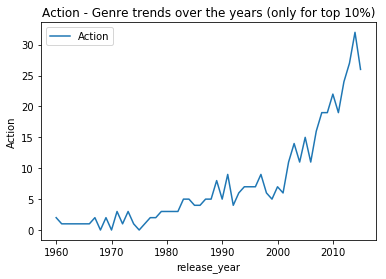

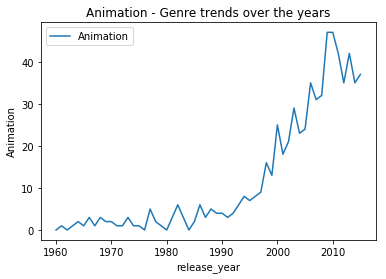

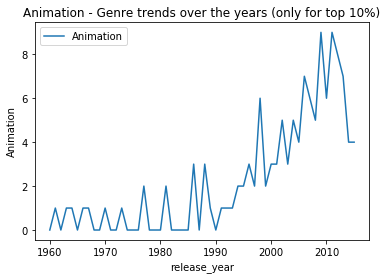

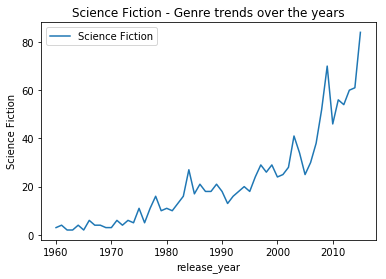

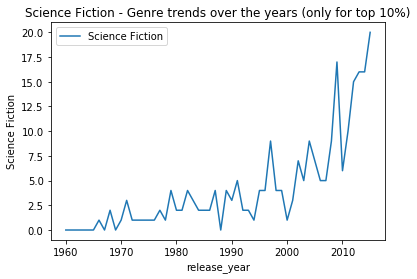

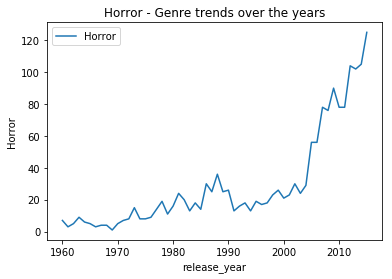

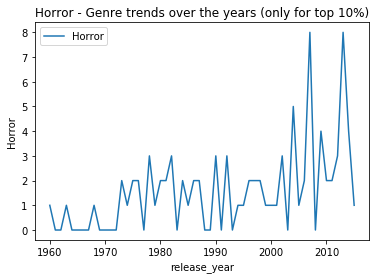

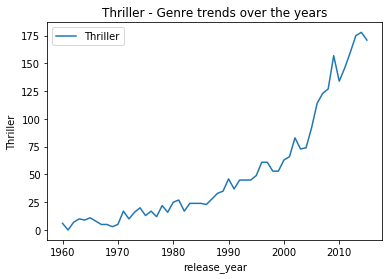

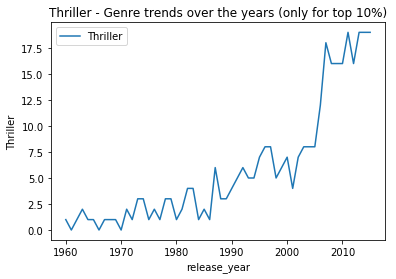

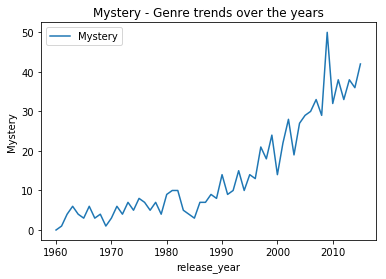

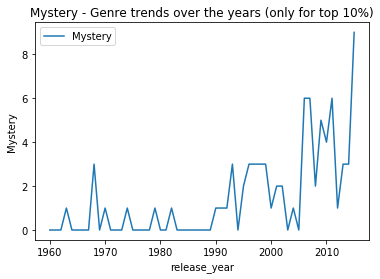

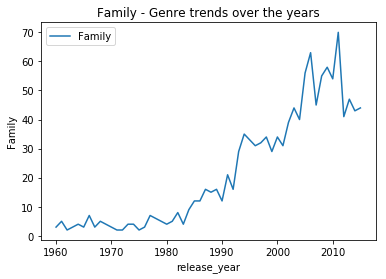

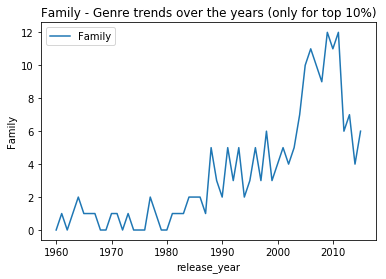

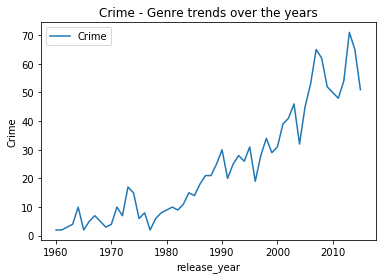

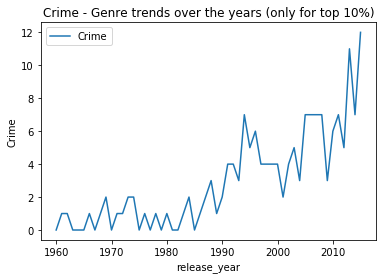

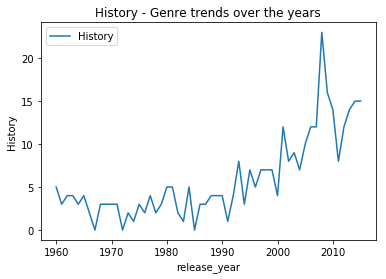

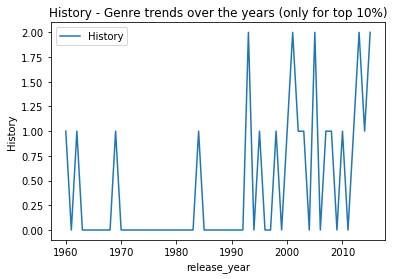

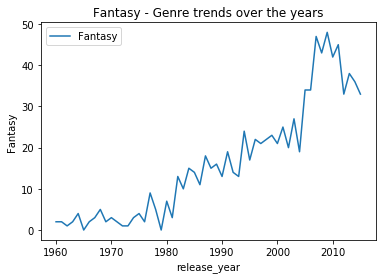

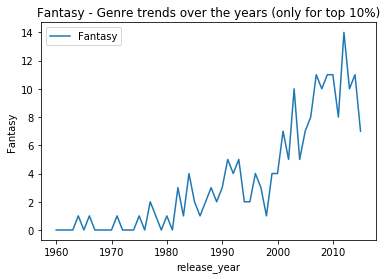

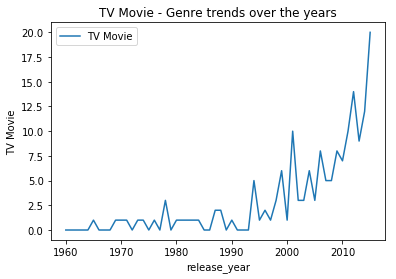

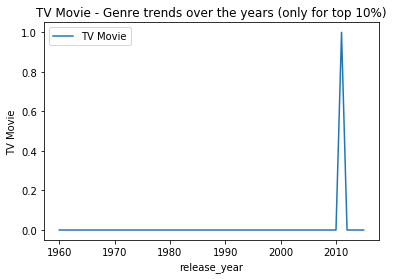

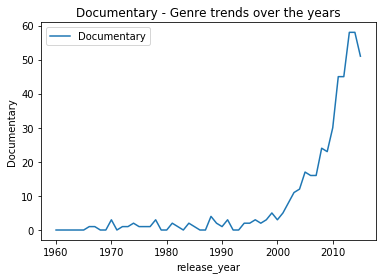

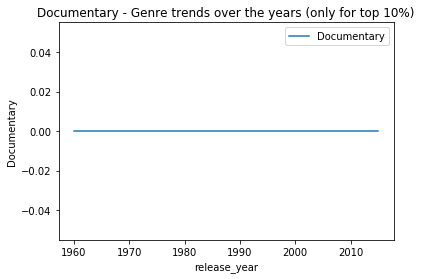

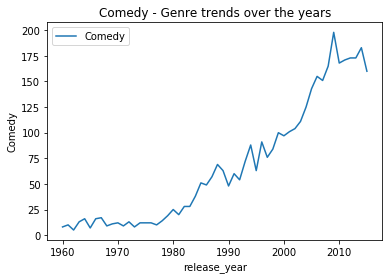

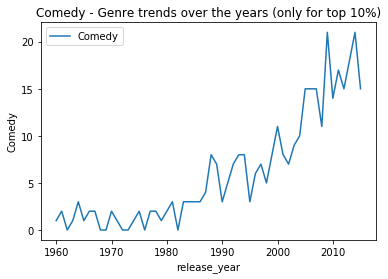

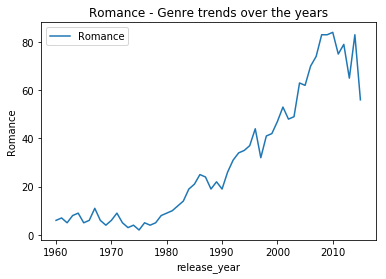

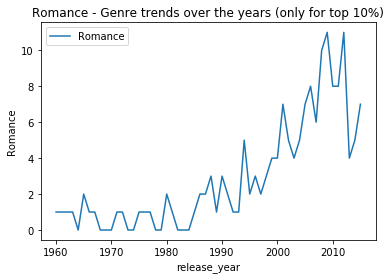

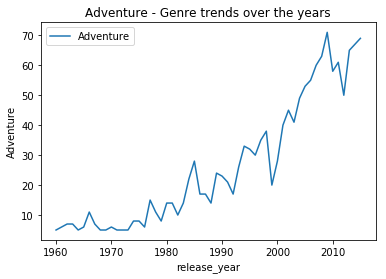

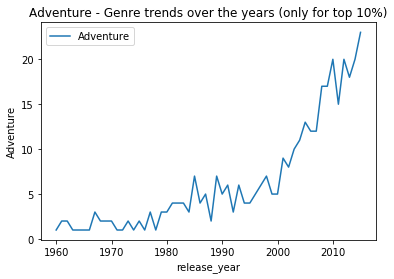

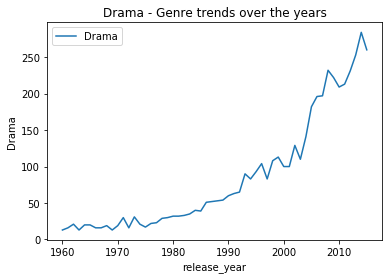

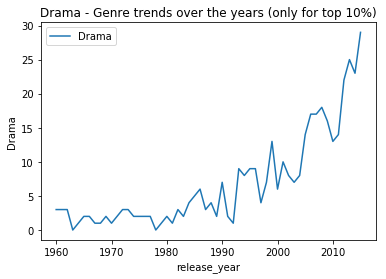

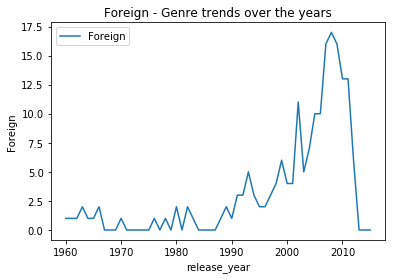

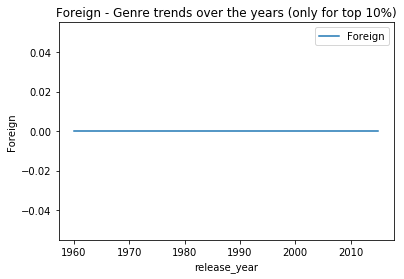

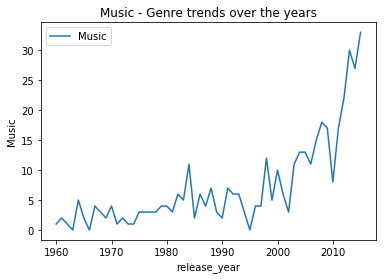

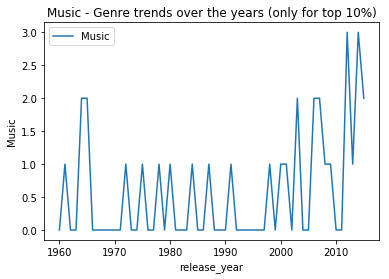

In [21]:
for genre in list(diff_genres):
    # Overall runtime variance over the years
    df_clean.groupby(by=['release_year'])[genre].sum().reset_index().sort_values(by=['release_year']).plot(
        x='release_year',y=genre,title=genre+' - Genre trends over the years').set(ylabel=genre);

    # Popular runtime variance over the years
    df_popularity.groupby(by=['release_year'])[genre].sum().reset_index().sort_values(by=['release_year']).plot(
        x='release_year',y=genre,title=genre+' - Genre trends over the years (only for top 10%)').set(ylabel=genre);


### 3. Who are the directors and actors making the most popular movies?

### 4. What are the genre combinations for the most popular movies?

#### Plot for overall rows and then only for top .0001 percentile

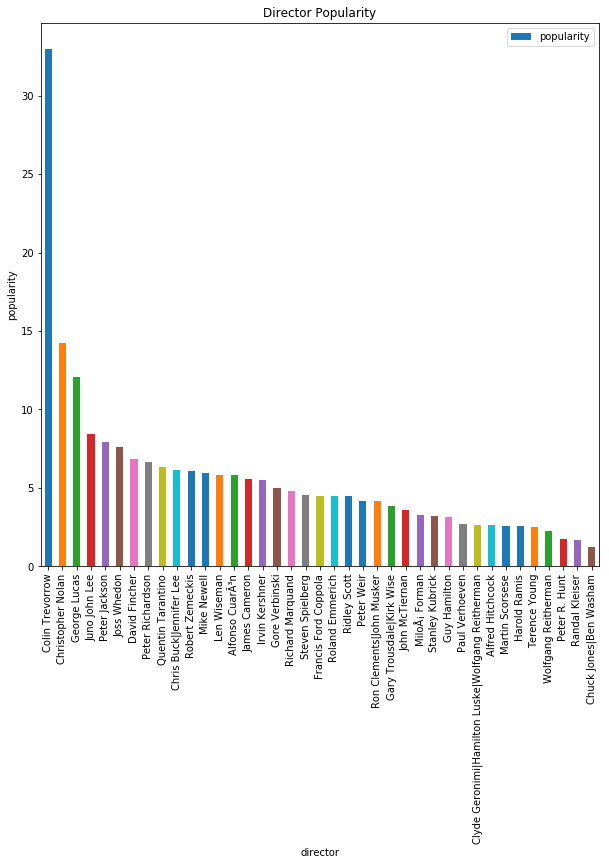

In [22]:
year_popularity_99 = df_clean.groupby('release_year')['popularity'].quantile(q=0.999)

df_popularity_99 = df_clean.apply(lambda row:row if row['popularity']>=year_popularity_99[row['release_year']] else None, axis=1)

# Group by director to see overall popularity of directors
df_popularity_99.groupby('director')['popularity'].mean().sort_values(ascending=False).reset_index().plot(x='director',y='popularity',title='Director Popularity', kind='bar', figsize=(10,10)).set(ylabel='popularity');

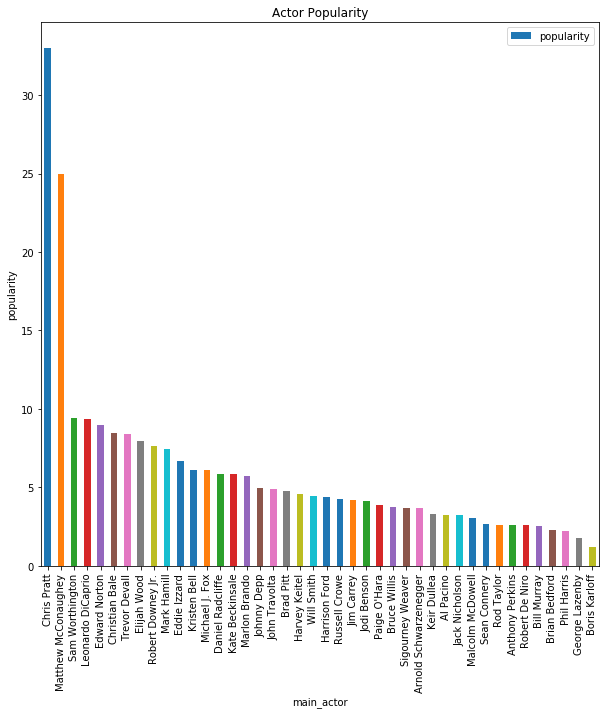

In [23]:
# Group by main_actor to see overall popularity of main_actors
df_popularity_99.groupby('main_actor')['popularity'].mean().sort_values(ascending=False).reset_index().plot(x='main_actor',y='popularity',title='Actor Popularity', kind='bar', figsize=(10,10)).set(ylabel='popularity');

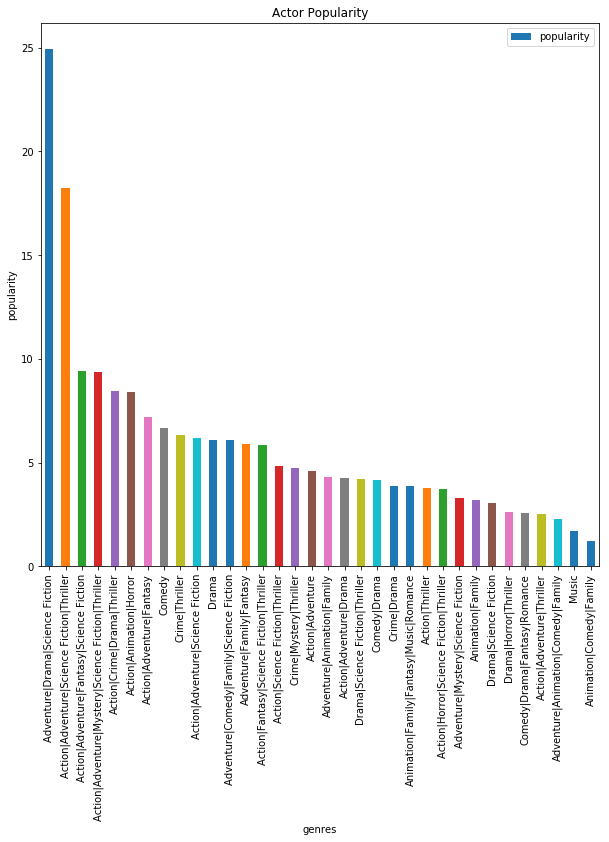

In [24]:
# Group by genres to see overall popularity of genres' sets
df_popularity_99.groupby('genres')['popularity'].mean().sort_values(ascending=False).reset_index().plot(x='genres',y='popularity',title='Actor Popularity', kind='bar', figsize=(10,10)).set(ylabel='popularity');

<a id='conclusions'></a>
## Conclusions

> <b>1. What is the trend of budget, popularity,vote_count and runtime's variance since the 1960s to the present? </b>
>> a. Budget, Vote Counts and Popularity Trends : All three of these trends have steadily increased over the years owing to the advent of technology. Budgets have increased with rising belief in special effects as opposed to only direction and filming. Vote counts and popularity have also increased with people finding it easier to have their opinions heard due to the Internet.<br>
>> b. Runtime : Runtime has decreased for overall movies, however, a healthy runtime for popular movies of today's day and age lies between 105 to 120 minutes.

> <b>2. Genre popularity over the years</b>
>> a. Adventure, Action, Science Fiction, Crime, Thriller, Romance, Comedy, Family and Fantasy have seen a steady increase in overall number of movies made and in the popular ones.<br>
>> b. History, Western, Music, Mystery, War, Horror movies have also increased in number but have had a tumultous relationship with popularity.<br>
>> c. Documentaries, Foreign and TV Movies have seen increase in numbers generally, but have had almost no popularity over the years.

><b>3. Actor, Director Popularity</b>
>> a. Chris Pratt, Mathew McCounaghey and Leonardo Dicaprio are leading the charge for actors.<br>
>> b. Colin Trevorrow, Christopher Nolan and George Lucas for the Directors<br>

# Limitations

#### Some records did not contain director and cast values, which was integral data to the above analyses, and so those movies had to be skipped. This might have affected the final stats and figures 
#### More than 1000 records did not contain production_companies names, which could have been a column in the analysis. Which are the production companies making the most number of blockbusters would have been an interesting statistic to find, if not for the insufficient and hence unreliable data.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295